In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold,datasets,decomposition
import pickle
import time

import networkx as nx
from scipy import spatial
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

import matplotlib.pyplot as plt

In [2]:
from umap import UMAP
import phate

In [3]:
mnist = datasets.fetch_openml("mnist_784", version=1)
color = mnist.target.astype(int)

In [4]:
type(mnist)

sklearn.utils._bunch.Bunch

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
pca = decomposition.PCA(n_components=100)
X = pca.fit_transform(mnist.data)

In [7]:
sum(pca.explained_variance_ratio_)

0.9149666084974454

In [8]:
with open('./mnist_X.dat', 'wb') as outfile:
    pickle.dump(X, outfile, pickle.HIGHEST_PROTOCOL)
    
with open('./mnist_color.dat', 'wb') as outfile:
    pickle.dump(color, outfile, pickle.HIGHEST_PROTOCOL)

In [9]:
import pickle
with open('./mnist_X.dat', 'rb') as infile:
    X = pickle.load(infile)
with open('./mnist_color.dat', 'rb') as infile:
    color = pickle.load(infile)

The code runs 429s.


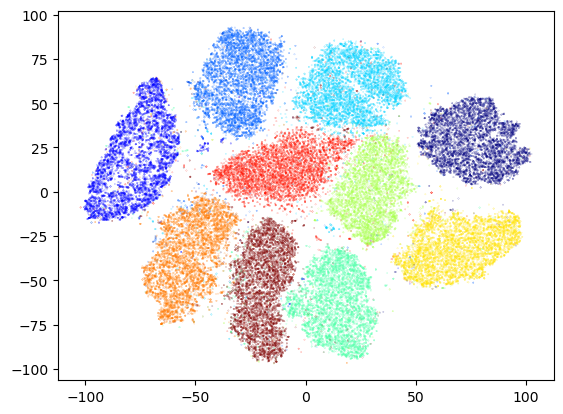

In [10]:
start_time = time.time()
tsne = manifold.TSNE(perplexity=50,init='pca',random_state=0) # n_components=2,  perplexity=5, init='pca', n_iter=300
Y_tsne = tsne.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=color,s =.01,cmap='jet')

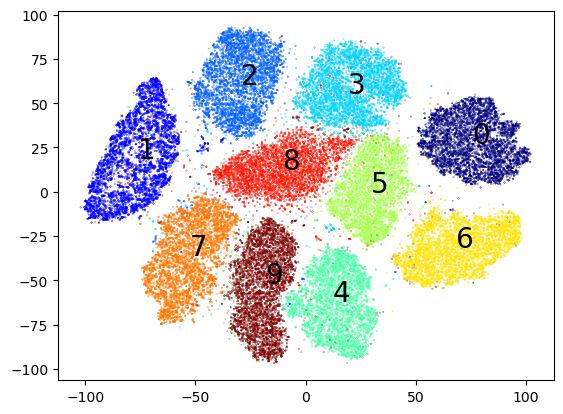

In [11]:
Y_tsne_df = pd.DataFrame(Y_tsne)
clusters = Y_tsne_df.groupby(color).mean()
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=color,s =.01,cmap='jet')
for i in range(10):
    plt.text(clusters[0][i],clusters[1][i],str(clusters.index.to_numpy()[i]),fontsize=20)
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=color,s =.01,cmap='jet')

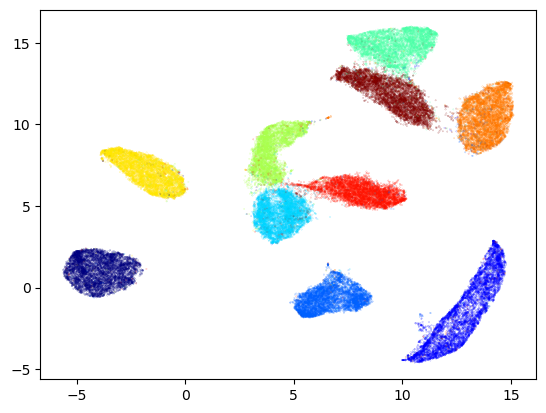

In [12]:
reducer = UMAP()  # n_neighbors=25,min_dist=0.6
Y_umap = reducer.fit_transform(X)
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=color,s =.01,cmap="jet")

C:\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


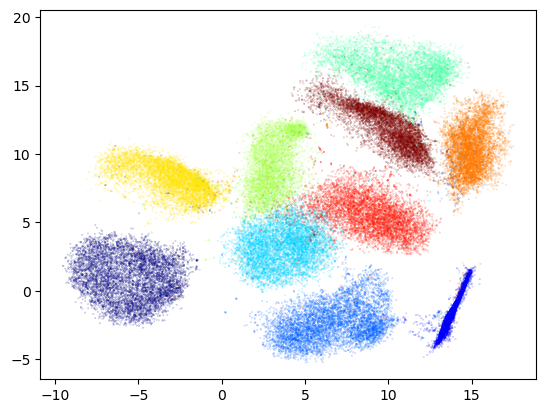

In [13]:
reducer = UMAP(densmap=True,random_state=0)  # n_neighbors=25,min_dist=0.6
Y_umap = reducer.fit_transform(X)
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=color,s =.01,cmap="jet")

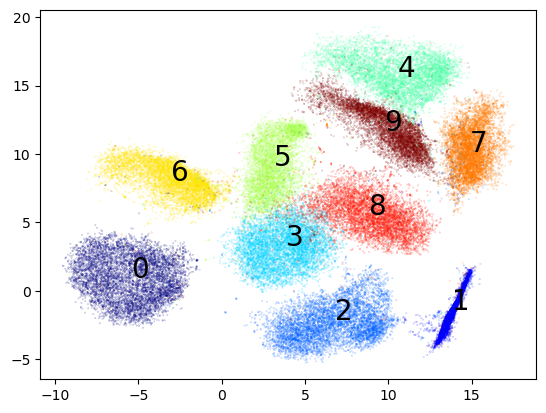

In [14]:
Y_umap_df = pd.DataFrame(Y_umap)
clusters = Y_umap_df.groupby(color).mean()
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=color,s =.01,cmap='jet')
for i in range(10):
    plt.text(clusters[0][i],clusters[1][i],str(clusters.index.to_numpy()[i]),fontsize=20)
plt.show()

Set graphtools logging to DEBUG
Calculating PHATE...
  Running PHATE on 70000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Building knn graph with landmarks
    Initializing [<class 'graphtools.graphs.kNNGraph'>, <class 'graphtools.graphs.LandmarkGraph'>] with arguments decay='40', anisotropy='0', knn_max='None', random_state='0', kernel_symm='+', verbose='2', initialize='True', knn='150', n_jobs='1', thresh='0.0001', theta='None', bandwidth_scale='1.0', bandwidth='None', n_pca='None', distance='euclidean', rank_threshold='None', n_svd='100', n_landmark='2000'
    Initializing kernel...
    Calculating KNN search...
    Calculated KNN search in 609.04 seconds.
    Calculating affinities...
      search_knn = 906; 84 remaining
      radius search on 84
    Calculated affinities in 3.75 seconds.
    Using addition symmetrization.
  Calculated graph and diffusion operator in 613.72 seconds.
  Calculating landmark operator...
    Calculating SVD...
    

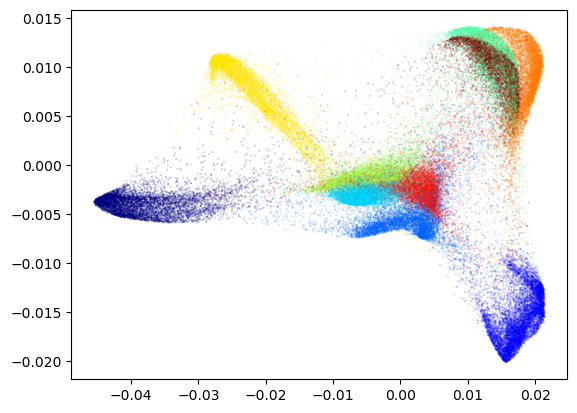

In [15]:
start_time = time.time()
phate_operator = phate.PHATE(knn=150,random_state=0,verbose=2) # verbose=9,
Y_phate = phate_operator.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_phate[:,0],Y_phate[:,1], c=color,s =.01,cmap="jet")

The code runs 624s.


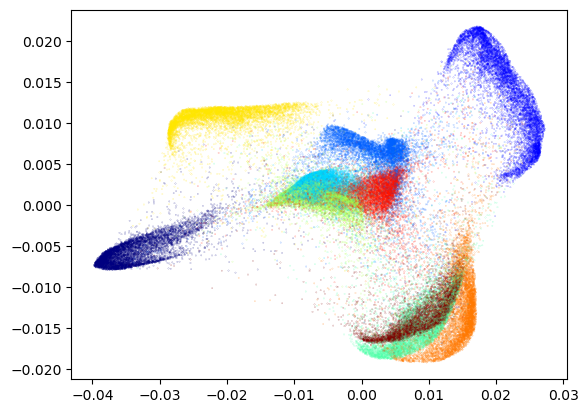

In [16]:
start_time = time.time()
phate_operator = phate.PHATE(knn=80,random_state=0,verbose=0) # verbose=9,
Y_phate = phate_operator.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_phate[:,0],Y_phate[:,1], c=color,s =.01,cmap="jet")

In [17]:
pd.DataFrame(Y_tsne).to_csv("./data/mnist_Y_tsne.csv",header=None, index=None)
pd.DataFrame(Y_umap).to_csv("./data/mnist_Y_umap.csv",header=None, index=None)
pd.DataFrame(Y_phate).to_csv("./data/mnist_Y_phate.csv",header=None, index=None)